In [1]:
%load_ext autoreload
%autoreload 2
import gensim
import pandas as pd
import numpy as np
from scipy import sparse

from sklearn.decomposition import PCA
import umap

import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained model

In [22]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    "ja-model/chive-1.1-mc15-20200318.txt", binary=False
)

# Embedding words

### Baseball team names and place names

In [96]:
team_list = [
    {"place": "東京", "team": "ジャイアンツ", "league": "セ"},
    {"place": "東京", "team": "スワローズ", "league": "セ"},
    {"place": "神奈川", "team": "ベイスターズ", "league": "セ"},
    {"place": "愛知", "team": "ドラゴンズ", "league": "セ"},
    {"place": "兵庫", "team": "タイガース", "league": "セ"},
    {"place": "広島", "team": "カープ", "league": "セ"},
    {"place": "北海道", "team": "ファイターズ", "league": "パ"},
    {"place": "宮城", "team": "イーグルス", "league": "パ"},
    {"place": "埼玉", "team": "ライオンズ", "league": "パ"},
    {"place": "千葉", "team": "マリーンズ", "league": "パ"},
    {"place": "大阪", "team": "バッファローズ", "league": "パ"},
    {"place": "福岡", "team": "ホークス", "league": "パ"},
]

# Extract the vector representation of words

In [185]:
words = [
    {"wordtype": "team", "word": x["team"], "v": model[x["team"]]}
    for i, x in enumerate(team_list)
]
words += [
    {"wordtype": "place", "word": x["place"], "v": model[x["place"]]}
    for i, x in enumerate(team_list)
]
word2id = {x["word"]: i for i, x in enumerate(words)}

word_table = pd.DataFrame(
    [
        {"word_id": i, "wordtype": x["wordtype"], "word": x["word"]}
        for i, x in enumerate(words)
    ]
)
word_vec = np.vstack([x["v"] for x in words])
print(word_vec.shape)

(24, 300)


# Visualization

### Project 300 dimensions onto 2 dimensional space for visualization

In [175]:
xy = PCA(n_components=2).fit_transform(word_vec)  # PCA
word_table["x"] = xy[:, 0]
word_table["y"] = xy[:, 1]

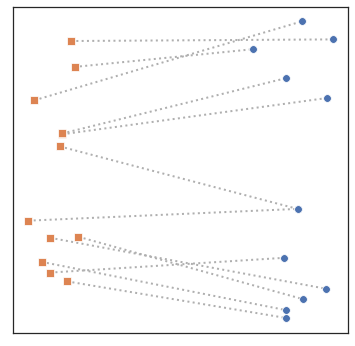

In [184]:
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")

labels = {"team": "Baseball team", "place": "Prefecture", "セ": "se", "パ": "pa"}
markers = {"team": "s", "place": "o", "セ": "o", "パ": "o"}

word_table_by_id = word_table.set_index("word_id")

fig, ax = plt.subplots(figsize=(6, 6))
for wordtype, df in word_table.groupby("wordtype"):
    ax = sns.scatterplot(
        data=df,
        x="x",
        y="y",
        label=labels[wordtype],
        s=60,
        marker=markers[wordtype],
        zorder=2,
    )

for team_place in team_list:
    team = team_place["team"]
    place = team_place["place"]

    i = word2id[team]
    j = word2id[place]

    xy0 = word_table_by_id.loc[i]
    xy1 = word_table_by_id.loc[j]
    ax.plot(
        [xy0["x"], xy1["x"]],
        [xy0["y"], xy1["y"]],
        color="#afafaf",
        ls=":",
        lw=2,
        zorder=0,
    )

ax.legend(frameon=False, loc="upper left").remove()
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticks([])
ax.set_xticks([])
fig.savefig("baseball-map.svg", dpi=300, bbox_inches="tight")

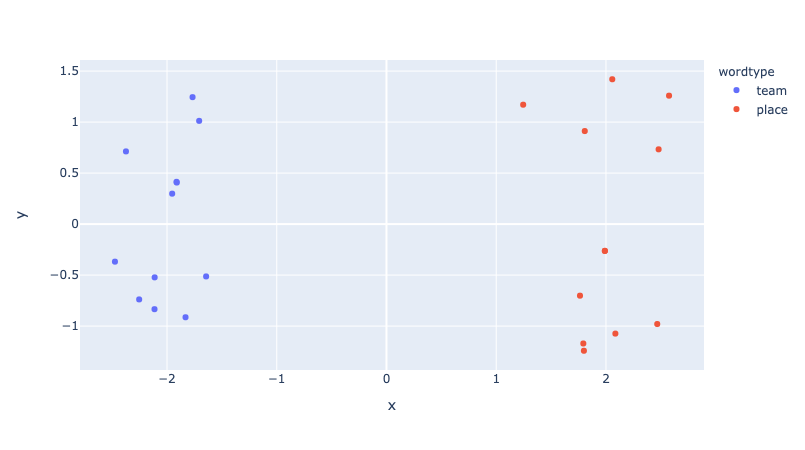

In [161]:
import plotly.express as px

fig = px.scatter(word_table, x="x", y="y", color="wordtype", hover_data=["word"])
fig.show()

In [187]:
model.most_similar("水素")
model.most_similar("ヘリウム")

[('ヘリウムガス', 0.7494298815727234),
 ('気体', 0.6336363554000854),
 ('重水素', 0.6246127486228943),
 ('中性子', 0.6023217439651489),
 ('アルゴン', 0.5967144966125488),
 ('アルゴンガス', 0.577016294002533),
 ('核融合', 0.5712903141975403),
 ('ウムガス', 0.5532474517822266),
 ('原子核', 0.5426738262176514),
 ('液化', 0.5266879200935364)]

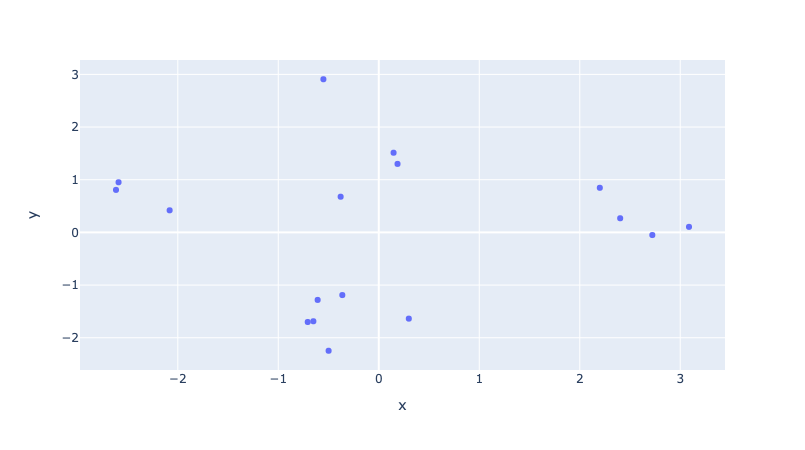

In [200]:
chemicals = [
    "水素",
    "ヘリウム",
    "リチウム",
    "ベリリウム",
    #"ホウ素",
    "炭素",
    "窒素",
    "酸素",
    #"フッ素",
    "ネオン",
    "ナトリウム",
    "マグネシウム",
    "アルミニウム",
    #"ケイ素",
    "リン",
    "硫黄",
    "塩素",
    "アルゴン",
    "カリウム",
    "カルシウム",
]


vec = []
for ch in chemicals:
    vec+=[model[ch]]

xy = PCA(n_components=2).fit_transform(np.vstack(vec))  # PCA
#ax = sns.scatterplot(x = xy[:,0], y = xy[:,1])

df = pd.DataFrame({"name":chemicals})
df["x"] = xy[:,0]
df["y"] = xy[:,1]

fig = px.scatter(df, x="x", y="y", hover_data=["name"])
fig.show()